<a href="https://colab.research.google.com/github/rohan472000/NASDAQ-data-analysis-LSTM/blob/main/NDAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr
key="87f601b3fffb4764176595daa3886d5efa8aa033"

In [2]:
df = pdr.get_data_tiingo('NDAQ', api_key=key)

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
dirname='drive/My Drive/NDAQ.csv'
df.to_csv(dirname)

In [4]:
import pandas as pd
df=pd.read_csv('drive/My Drive/NDAQ.csv')
df.head()

symbol                       date  close   high    low   open   volume  \
0   NDAQ  2017-12-29 00:00:00+00:00  76.83  77.17  76.60  76.80   921839   
1   NDAQ  2018-01-02 00:00:00+00:00  76.74  77.32  76.47  77.15  1119938   
2   NDAQ  2018-01-03 00:00:00+00:00  77.66  77.87  76.58  76.64   998415   
3   NDAQ  2018-01-04 00:00:00+00:00  78.69  78.96  77.54  77.64   956602   
4   NDAQ  2018-01-05 00:00:00+00:00  79.21  79.55  78.70  79.01   926725   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  23.614516  23.719019  23.543823  23.605296    2765517      0.0          1.0  
1  23.586854  23.765123  23.503867  23.712872    3359814      0.0          1.0  
2  23.869626  23.934171  23.537676  23.556118    2995245      0.0          1.0  
3  24.186207  24.269194  23.832742  23.863478    2869806      0.0          1.0  
4  24.346035  24.450537  24.189281  24.284562    2780175      0.0          1.0

In [5]:
df1=df.reset_index()['close']
df1

0       76.83
1       76.74
2       77.66
3       78.69
4       79.21
        ...  
1252    60.12
1253    61.51
1254    61.06
1255    61.28
1256    60.98
Name: close, Length: 1257, dtype: float64

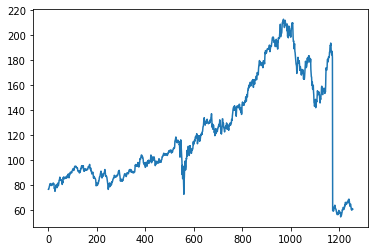

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.13967611]
 [0.13910678]
 [0.14492662]
 ...
 [0.0399165 ]
 [0.0413082 ]
 [0.03941043]]


In [10]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(817, 440)

In [12]:
train_data

array([[0.13967611],
       [0.13910678],
       [0.14492662],
       [0.15144231],
       [0.15473178],
       [0.15947621],
       [0.16080466],
       [0.16751012],
       [0.16263917],
       [0.1687753 ],
       [0.16238613],
       [0.16263917],
       [0.15865385],
       [0.16017206],
       [0.16371457],
       [0.16105769],
       [0.16713057],
       [0.16719383],
       [0.16833249],
       [0.170167  ],
       [0.17143219],
       [0.16548583],
       [0.16839575],
       [0.16188006],
       [0.1437247 ],
       [0.14530617],
       [0.14245951],
       [0.12942814],
       [0.13512146],
       [0.14429403],
       [0.15024038],
       [0.15821103],
       [0.1621331 ],
       [0.15352986],
       [0.15213816],
       [0.15416245],
       [0.14834261],
       [0.16276569],
       [0.17023026],
       [0.17042004],
       [0.16447368],
       [0.15719889],
       [0.16346154],
       [0.17092611],
       [0.18446356],
       [0.1847166 ],
       [0.19047318],
       [0.201

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 359ms/step - loss: 0.0306 - accuracy: 0.0000e+00 - val_loss: 0.0683 - val_accuracy: 0.0059
Epoch 2/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0268 - val_accuracy: 0.0059
Epoch 3/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0307 - val_accuracy: 0.0059
Epoch 4/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 0.0233 - val_accuracy: 0.0059
Epoch 5/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0059
Epoch 6/100
12/12 [==============================] - 3s 227ms/step - loss: 9.5196e-04 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0059
Epoch 7/100
12/12 [==============================] - 3s 221ms/step - loss: 9.7682e-04 - accuracy: 0.0000e+00 - va

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 40ms/step


In [23]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

107.37655092942182

In [25]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

165.85980986560122

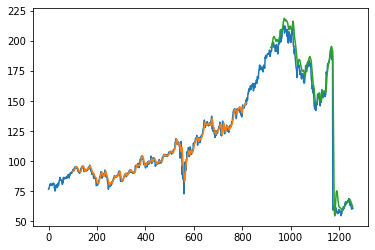

In [26]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test_data)

440

In [28]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [29]:
len(x_input)

1

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8103491902834008,
 0.8123734817813764,
 0.8340713562753035,
 0.8338815789473684,
 0.8582363360323886,
 0.8679149797570849,
 0.8656376518218623,
 0.8794913967611335,
 0.8689903846153846,
 0.8372975708502024,
 0.8292004048582997,
 0.8196482793522266,
 0.8316675101214575,
 0.8378036437246963,
 0.8054149797570849,
 0.031313259109311764,
 0.030680668016194346,
 0.030237854251012164,
 0.0331477732793522,
 0.031186740890688236,
 0.03713309716599189,
 0.048519736842105254,
 0.05275809716599189,
 0.05383350202429149,
 0.059210526315789436,
 0.044913967611336036,
 0.046052631578947345,
 0.04023279352226716,
 0.039600202429149745,
 0.03782894736842102,
 0.028150303643724672,
 0.02416497975708498,
 0.01676366396761131,
 0.013790485829959509,
 0.011513157894736836,
 0.013980263157894746,
 0.02258350202429149,
 0.014929149797570818,
 0.012209008097165963,
 0.0226467611336032,
 0.032578441295546545,
 0.03143977732793518,
 0.030111336032388636,
 0.018408400809716563,
 0.018661437246963564,
 0.02119

In [31]:
len(temp_input)

99

In [43]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=101
i=0
while(i<30):
    
    if(len(temp_input)>101):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.81237348 0.83407136 0.83388158 0.85823634 0.86791498 0.86563765
 0.8794914  0.86899038 0.83729757 0.8292004  0.81964828 0.83166751
 0.83780364 0.80541498 0.03131326 0.03068067 0.03023785 0.03314777
 0.03118674 0.0371331  0.04851974 0.0527581  0.0538335  0.05921053
 0.04491397 0.04605263 0.04023279 0.0396002  0.03782895 0.0281503
 0.02416498 0.01676366 0.01379049 0.01151316 0.01398026 0.0225835
 0.01492915 0.01220901 0.02264676 0.03257844 0.03143978 0.03011134
 0.0184084  0.01866144 0.0211918  0.01790233 0.02403846 0.
 0.01265182 0.01556174 0.00790739 0.01322115 0.01891447 0.02543016
 0.03669028 0.03340081 0.03732287 0.04763411 0.04738107 0.04807692
 0.03776569 0.04314271 0.04523026 0.04845648 0.06212045 0.05604757
 0.07249494 0.07369686 0.07141953 0.06351215 0.06711791 0.06395496
 0.06813006 0.07091346 0.07445597 0.07831478 0.0784413  0.07287449
 0.07179909 0.08672824 0.08691802 0.09001771 0.08293269 0.07755567
 0.06382844 0.0597166  0.05345395 0.0628163  0.06477733 0.05

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

1257

In [47]:
len(lst_output)

30

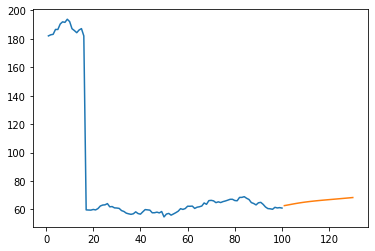

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

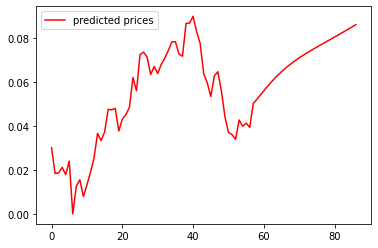

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:],label = 'predicted prices',color='red')
plt.legend()
plt.show()

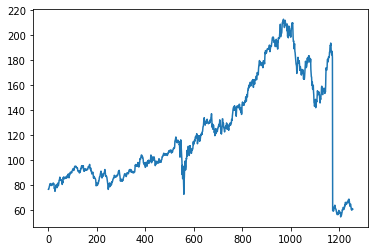

In [53]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(scaler.inverse_transform(df1))
# plt.plot(df3,color='black')
# plt.legend()
# plt.show()